<a href="https://colab.research.google.com/github/Yashdalot/GoogleColab/blob/master/Covid_Hotspot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import requests
res = requests.get("https://raw.githubusercontent.com/covid19india/api/gh-pages/raw_data.json")

In [0]:
d=res.json()

In [0]:
l = d["raw_data"]

In [10]:
print(l[0].keys())

dict_keys(['agebracket', 'backupnotes', 'contractedfromwhichpatientsuspected', 'currentstatus', 'dateannounced', 'detectedcity', 'detecteddistrict', 'detectedstate', 'estimatedonsetdate', 'gender', 'nationality', 'notes', 'patientnumber', 'source1', 'source2', 'source3', 'statecode', 'statepatientnumber', 'statuschangedate', 'typeoftransmission'])


In [0]:

import csv

with open('data.csv', 'w', newline='') as csvfile:
    fieldnames = l[0].keys()
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for obj in l:
      writer.writerow(obj)


In [0]:
import pandas as pd
df = pd.read_csv("data.csv",encoding='latin-1')

In [97]:
df.head()

,agebracket,backupnotes,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,estimatedonsetdate,gender,nationality,notes,patientnumber,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission
0,20,Student from Wuhan,NaN,Recovered,30/01/2020,Thrissur,Thrissur,Kerala,NaN,F,India,Travelled from Wuhan,1,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,KL,KL-TS-P1,14/02/2020,Imported
1,NaN,Student from Wuhan,NaN,Recovered,02/02/2020,Alappuzha,Alappuzha,Kerala,NaN,NaN,India,Travelled from Wuhan,2,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,KL,KL-AL-P1,14/02/2020,Imported
2,NaN,Student from Wuhan,NaN,Recovered,03/02/2020,Kasaragod,Kasaragod,Kerala,NaN,NaN,India,Travelled from Wuhan,3,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,KL,KL-KS-P1,14/02/2020,Imported
3,45,Travel history to Italy and Austria,NaN,Recovered,02/03/2020,East Delhi (Mayur Vihar),East Delhi,Delhi,NaN,M,India,"Travelled from Austria, Italy",4,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,NaN,DL,DL-P1,15/03/2020,Imported
4,24,"Travel history to Dubai, Singapore contact",NaN,Recovered,02/03/2020,Hyderabad,Hyderabad,Telangana,NaN,M,India,"Travelled from Dubai to Bangalore on 20th Feb,...",5,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,TG,TS-P1,02/03/2020,Imported


In [0]:
data = df[["detectedcity","detectedstate"]]

In [0]:
data.dropna()

In [34]:
data.head()

,detectedcity,detectedstate
0,Thrissur,Kerala
1,Alappuzha,Kerala
2,Kasaragod,Kerala
3,East Delhi (Mayur Vihar),Delhi
4,Hyderabad,Telangana


In [0]:
def maxcity(state):
  cities = data[data["detectedstate"]==state].dropna()["detectedcity"].unique()
  # print(cities)
  maxno=0
  c=""
  for city in cities:
    n=len(data[data["detectedcity"]==city])
    # print(n,city,maxno)
    if(maxno<n):
      maxno=n
      c = city
  return c,maxno


In [0]:
d={}
cases=[]
for state in data["detectedstate"].unique():
  city,no = maxcity(state)
  d[state] = city
  cases.append(no)
  
final_data = pd.DataFrame.from_dict(d, orient='index')

final_data.reset_index(inplace = True)

final_data.columns = ['Name of State','City with Maximum Cases']
final_data["Cases"] = cases

In [95]:
final_data.head()

,Name of State,City with Maximum Cases,Cases
0,Kerala,Kasaragod,26
1,Delhi,Nizamuddin area,24
2,Telangana,Hyderabad,23
3,Rajasthan,Bhilwara,19
4,Haryana,Gurugram,17


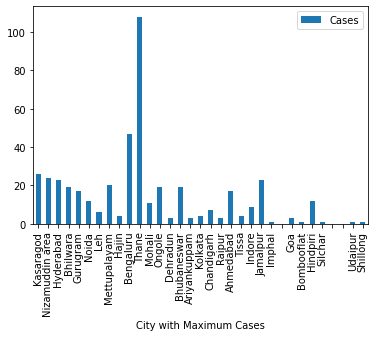

In [96]:
final_data.plot(x = "City with Maximum Cases" , y="Cases",kind="bar")